# Sliders Part 1

In [21]:
import ipywidgets as widgets
from IPython.display import display

'''
For FloatLogSlider
The min and max refer to the minimum and maximum exponents of the base,
and the value refers to the actual value of the slider.
value=10,
base=10,
min=-10, # max exponent of base
max=10, # min exponent of base
'''

#slider = widgets.FloatLogSlider(
#slider = widgets.FloatSlider(
slider = widgets.IntSlider(
    value=7, # start value
    min=0,
    max=10,
    step=1, # the incremental size of each slide movement
    description='Test:', # The label next to the slider
    disabled=False, # its not active
    continuous_update=True, # continually updating values or only updating values when a user submits the value
    orientation='horizontal', # slider orientation
    readout=True, # displays the current value of the slider next to it
    readout_format='d' # specifies the format function used to represent slider value. default ‘.2f’
)

display(slider)

IntSlider(value=7, description='Test:', max=10)

# Sliders Part 2

In [22]:
# run code in https://jupyter.org/try to get it to work
import ipywidgets as widgets

out = widgets.Output()
def on_value_change(change):
    with out:
        print(change['new'])

slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True)
play = widgets.Play(min=1, interval=1000)

slider.observe(on_value_change, names='value')
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.VBox([out, play, slider])

# Buttons

This example displays a basic button

In [23]:
import ipywidgets as widgets
from IPython.display import display

button = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='This is what you click when you want to click a button',
    icon='child' # (FontAwesome names without the `fa-` prefix) https://fontawesome.com/v5.15/icons?m=free
)

display(button)

Button(description='Click me', icon='child', style=ButtonStyle(), tooltip='This is what you click when you wan…

# Listeners

This example button click listener

In [24]:
import ipywidgets as widgets
from IPython.display import display

label = widgets.Label('This is a label')

button = widgets.Button(description='Click me')
click_count = 0

def click_listener(btn):
    global click_count
    global label
    click_count += 1
    click_str = f'Clicked {click_count}'
    label.value = click_str


button.on_click(click_listener)
display(label)
display(button)

Label(value='This is a label')

Button(description='Click me', style=ButtonStyle())

# Images

This example shows you how to display an image.

*If you are not using a Carbon Workspace, for this code to work run the following commands:*

`pip install pillow`

`pip install requests`

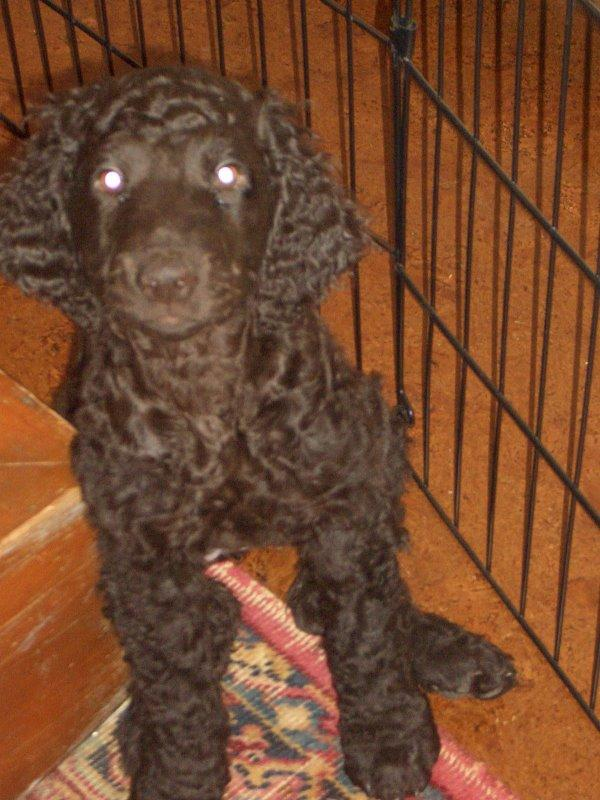

In [25]:
import os

from PIL import Image
import shutil
import requests
from IPython.display import display

TEMP_FILE_NAME = 'temp_file'

def download_file(url):
    response = requests.get(url, stream=True)
    with open(TEMP_FILE_NAME, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

def get_dog_image(max_width=300):
    response = requests.get('https://dog.ceo/api/breeds/image/random')
    if response.ok:
        url = response.json()['message']
        download_file(url)
        im = Image.open(TEMP_FILE_NAME)
        os.remove(TEMP_FILE_NAME)

        scale = 1

        if max_width < im.width:
            scale = max_width / im.width
        
        im.resize(( int(im.width * scale), int(im.height * scale)))
        return im

display(get_dog_image())

# Calculator

This example shows how to format widgets in grids using horizontal boxes (hbox) and vertical boxes (vbox)

In [26]:
import ipywidgets as widgets
from IPython.display import display

main_text = widgets.Label()

def click_event(btn):
    global main_text
    main_text.value += btn.description

def create_button(text, callable):
    btn = widgets.Button(description=text)
    btn.on_click(callable)
    return btn

def clear_event(btn):
    global main_text
    main_text.value = ''

def calc_event(btn):
    global main_text
    main_text.value = str(eval(main_text.value))

place_holder = widgets.Button(disabled=True)

row_1 = [create_button(str(i), click_event) for i in range(1, 4)]
row_2 = [create_button(str(i), click_event) for i in range(4, 7)]
row_3 = [create_button(str(i), click_event) for i in range(7, 10)]
row_4 = [create_button(str(0), click_event), create_button('Clear', clear_event), create_button('=', calc_event)]

hbox_1 = widgets.HBox(row_1)
hbox_2 = widgets.HBox(row_2)
hbox_3 = widgets.HBox(row_3)
hbox_4 = widgets.HBox(row_4)
numbers = widgets.VBox([hbox_1, hbox_2, hbox_3, hbox_4])
ops = widgets.VBox([create_button(str(op), click_event) for op in ('+', '-', '*', '/')])
button_grid = widgets.HBox([numbers, ops])
total_grid = widgets.VBox([main_text, button_grid])

display(total_grid)